In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
%run ./keys.ipynb

In [3]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

api

In [4]:
data = api.me()

In [5]:
cursor = tweepy.Cursor(api.user_timeline, id='populares', tweet_mode='extended').items(1)

In [ ]:
# followers

In [10]:
pp_followers = api.followers('@populares', count=2)

In [12]:
pp_followers[0]._json

{'id': 1144001375392714757,
 'id_str': '1144001375392714757',
 'name': 'ιєѕυѕ єт мυη∂υм🌍',
 'screen_name': 'Iesus_mundum',
 'location': '🇪🇸 🇪🇺',
 'description': 'Ciudadano por la libertad y la paz. Y ya mayor, para creerme cualquier demagogia  #Libre\nNi santo ni perfecto, pero Dios me ama tal como soy, esa es mi fe. ☦️',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 66,
 'friends_count': 250,
 'listed_count': 1,
 'created_at': 'Wed Jun 26 21:55:57 +0000 2019',
 'favourites_count': 326,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 1133,
 'lang': None,
 'status': {'created_at': 'Fri Apr 09 18:35:51 +0000 2021',
  'id': 1380590294702374913,
  'id_str': '1380590294702374913',
  'text': 'RT @sammysadday: “Tu vida como cristiano debe hacer que los no creyentes se cuestionen su incredulidad en Dios”.\nDietrich Bonhoeffer (1906-…',
  'truncated': False,
  'entities': {'hashtags': [],

In [18]:
# total followers by party. PROBLEM: just take 20.
def get_followers(user):
    followers = [follower._json for follower in api.followers(user)]
    return pd.DataFrame(followers)

In [24]:
df_followers = get_followers('@populares')

(20, 47)

In [25]:
# PP DATA

In [35]:
cursor = tweepy.Cursor(api.user_timeline, id='populares', tweet_mode='extended').items(1)

In [36]:
for i in cursor:
    print(i)

Status(_api=<tweepy.api.API object at 0x7feebcc6b400>, _json={'created_at': 'Fri Apr 09 18:45:51 +0000 2021', 'id': 1380592811385446409, 'id_str': '1380592811385446409', 'full_text': '🔴 #ÚLTIMAHORA: La Junta Electoral da la razón al PP y ordena retirar la lona publicitaria del PSOE en Callao.\n\n👉 Una vez más, son las instituciones las que tienen que pararle los pies al sanchismo.\n\nhttps://t.co/z1Lks5Zf2A', 'truncated': False, 'display_text_range': [0, 222], 'entities': {'hashtags': [{'text': 'ÚLTIMAHORA', 'indices': [2, 13]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/z1Lks5Zf2A', 'expanded_url': 'https://www.larazon.es/madrid/20210409/mw6xvl6bdjeyndbwdtcru6qxom.html', 'display_url': 'larazon.es/madrid/2021040…', 'indices': [199, 222]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None,

## Wordcloud

Enter the term to be searched psoe
Enter the number of tweets 500


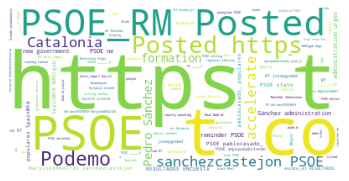

In [27]:
search_term = input("Enter the term to be searched")
number_of_tweets = int(input("Enter the number of tweets"))

tweets = tweepy.Cursor(api.search, q=search_term, lang="en").items(number_of_tweets)

cloud = ""
for each in tweets:
    cloud = cloud + each.text

cloud = WordCloud(background_color="white").generate(cloud)

plt.imshow(cloud)
plt.axis('off')
plt.show()

FUNCTIONS

In [ ]:
def cleaning_dates(column):
    
    list_dates = list(column)
    
    dates = []

    for d in list_dates:
        date_split = d.split(' ')
        dates.append(date_split)
        
    return dates

In [ ]:
# columns names.

columns = df_pp_alltweets.columns

for col in columns:
    print(col)

In [ ]:
def format_date(column):
    
    list_dates = list(column)
    
    new_format_dates = []

    for d in list_dates:
        old_format_date = datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y')
        new_format_date = datetime.strftime(old_format_date, '%d-%m-%Y')
        new_format_dates.append(new_format_date)
        
    return new_format_dates

In [ ]:
# cleaning source column 

def cleaning_source(column):
    
    list_sources = list(column)
    
    sources_clean = [re.findall(r'\>(.*?)\<', s) for s in list_sources]
        
    return sources_clean